In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as  plt

In [2]:
data = pd.read_csv('../artifacts/sentiment_analysis.csv')

In [3]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [4]:
data.shape

(7920, 3)

In [5]:
data.duplicated().sum()

np.int64(0)

In [6]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [7]:
import re
import string

In [8]:
data['tweet']=data['tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [9]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #pregnancy test https://goo.gl/h1...
1,2,0,finally a transparant silicon case ^^ thanks t...
2,3,0,we love this! would you go? #talk #makememorie...
3,4,0,i'm wired i know i'm george i was made that wa...
4,5,1,what amazing service! apple won't even talk to...


In [10]:
data['tweet']=data['tweet'].apply(lambda x: " ".join((re.sub(r'http\S+|www\S+|https\S+', '', x,flags=re.MULTILINE) for x in x.split())))

In [11]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #pregnancy test #android #apps #...
1,2,0,finally a transparant silicon case ^^ thanks t...
2,3,0,we love this! would you go? #talk #makememorie...
3,4,0,i'm wired i know i'm george i was made that wa...
4,5,1,what amazing service! apple won't even talk to...


In [12]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text= text.replace(punctuation,' ')
    return text

data['tweet']=data['tweet'].apply(remove_punctuations)

In [13]:
data.head()

,id,label,tweet
0,1,0,fingerprint pregnancy test android apps ...
1,2,0,finally a transparant silicon case thanks t...
2,3,0,we love this would you go talk makememorie...
3,4,0,i m wired i know i m george i was made that wa...
4,5,1,what amazing service apple won t even talk to...


In [14]:
data['tweet']=data['tweet'].str.replace(r'\d+',' ',regex=True)

In [15]:
data.tail(10)

,id,label,tweet
7910,7911,0,perfect match instagood applewatch red ins...
7911,7912,0,i am completely in love with the new iphone em...
7912,7913,0,tune in turn on drop out gtd in one app ...
7913,7914,1,ok so my galaxy crashed after one day now i ha...
7914,7915,0,gain followers rt this must follow me i follow...
7915,7916,0,live out loud lol liveoutloud selfie smile...
7916,7917,0,we would like to wish you an amazing day make...
7917,7918,0,helping my lovely year old neighbor with her...
7918,7919,0,finally got my smart pocket wifi stay conne...
7919,7920,0,apple barcelona apple store bcn barcelo...


In [16]:
import nltk

In [17]:
nltk.download('stopwords',download_dir='../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [18]:
with open('../static/model/corpora/stopwords/english','r') as file:
    sw=file.read().splitlines()

In [19]:
sw

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [20]:
data['tweet']=data['tweet'].apply(lambda x: " ".join(x for x in x.split()if x not in sw))

In [21]:
data.head()

,id,label,tweet
0,1,0,fingerprint pregnancy test android apps beauti...
1,2,0,finally transparant silicon case thanks uncle ...
2,3,0,love would go talk makememories unplug relax i...
3,4,0,wired know george made way iphone cute daventr...
4,5,1,amazing service apple even talk question unles...


In [22]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [23]:
data['tweet']=data['tweet'].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

In [24]:
data['tweet'].head()

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    wire know georg made way iphon cute daventri home
4    amaz servic appl even talk question unless pay...
Name: tweet, dtype: object

In [25]:
from collections import Counter
vocab=Counter()

In [26]:
for sentence in data['tweet']:
    vocab.update(sentence.split())

In [27]:
len(vocab)

16122

In [28]:
tokens=[key for key in vocab if vocab [key]>15]

In [29]:
len(tokens)

842

In [30]:
def save_vocabulary(lines,filename):
    data = '\n'.join(lines)
    file = open(filename, 'w',encoding="utf-8")
    file.write(data)
    file.close()

save_vocabulary(tokens,'../static/model/vocabulary.txt')

In [31]:
x= data['tweet']
y=data['label']

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [33]:
x_train.shape

(6336,)

In [34]:
x_test.shape

(1584,)

In [35]:
def vectorizer(ds, vocabulary):
    vectorized_lst = []
    
    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))
        
        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] = 1
                
        vectorized_lst.append(sentence_lst)
        
    vectorized_lst_new = np.asarray(vectorized_lst, dtype=np.float32)
    
    return vectorized_lst_new

In [36]:
vectorized_x_train=vectorizer(x_train,tokens)

In [37]:
vectorized_x_test=vectorizer(x_test,tokens)

In [38]:
y_train.value_counts()

label
0    4710
1    1626
Name: count, dtype: int64

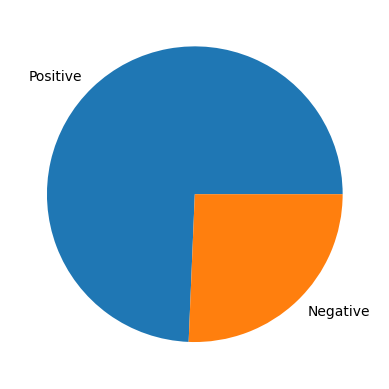

In [39]:
plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

In [40]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)
print(vectorized_x_train_smote.shape, y_train_smote.shape)

(9420, 842) (9420,)


In [41]:
y_train_smote.value_counts()

label
1    4710
0    4710
Name: count, dtype: int64

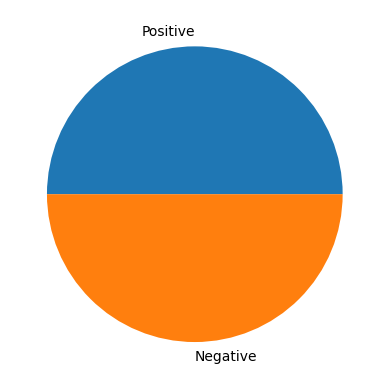

In [42]:
plt.pie(np.array([y_train_smote.value_counts()[0], y_train_smote.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [44]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')
    
def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

### linear regression

In [45]:
lr_test = LogisticRegression()
param_grid = {
    'fit_intercept': [True, False],
    'C': [0.01, 0.1, 1, 10],  # Common hyperparameter for regularization strength
    'solver': ['liblinear', 'lbfgs']  # solvers that support binary classification
}

grid_search = GridSearchCV(estimator=lr_test,
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',  # better for classification than MSE
                           n_jobs=-1)

grid_search.fit(vectorized_x_train_smote, y_train_smote)

print("Best parameters:", grid_search.best_params_)

Best parameters: {'C': 1, 'fit_intercept': True, 'solver': 'lbfgs'}


In [46]:
lr=LogisticRegression(C=1, fit_intercept= True, solver= 'lbfgs')
lr.fit(vectorized_x_train_smote,y_train_smote)
y_train_pred=lr.predict(vectorized_x_train_smote)
y_text_pred=lr.predict(vectorized_x_test)

In [47]:
training_scores( y_train_smote,y_train_pred)

Training Scores:
	Accuracy = 0.931
	Precision = 0.907
	Recall = 0.961
	F1-Score = 0.933


In [48]:
 validation_scores(y_test,y_text_pred)

Testing Scores:
	Accuracy = 0.871
	Precision = 0.7
	Recall = 0.853
	F1-Score = 0.769


### naive bays

In [49]:
mnb_test = MultinomialNB()
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 5.0, 10.0],   
    'fit_prior': [True, False]
}

grid_search = GridSearchCV(estimator=mnb_test,
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1)
grid_search.fit(vectorized_x_train_smote, y_train_smote)
print("Best parameters:", grid_search.best_params_)

Best parameters: {'alpha': 0.1, 'fit_prior': True}


In [50]:
mnb=MultinomialNB(alpha= 0.1, fit_prior= True)
mnb.fit(vectorized_x_train_smote,y_train_smote)
y_train_pred=mnb.predict(vectorized_x_train_smote)
y_text_pred=mnb.predict(vectorized_x_test)

In [51]:
training_scores( y_train_smote,y_train_pred)

Training Scores:
	Accuracy = 0.907
	Precision = 0.874
	Recall = 0.951
	F1-Score = 0.911


In [52]:
validation_scores(y_test,y_text_pred)

Testing Scores:
	Accuracy = 0.865
	Precision = 0.682
	Recall = 0.87
	F1-Score = 0.765


### descision tree

In [53]:
dt_test = DecisionTreeClassifier()
param_grid = {
    'criterion': ['gini', 'entropy'],             
    'max_depth': [None, 5, 10, 20, 30],           
    'min_samples_split': [2, 5, 10],              
    'min_samples_leaf': [1, 2, 4],                
    'max_features': [None, 'sqrt', 'log2']      
}

grid_search = GridSearchCV(estimator=dt_test,
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1)
grid_search.fit(vectorized_x_train_smote, y_train_smote)
print("Best parameters:", grid_search.best_params_)

Best parameters: {'criterion': 'gini', 'max_depth': 20, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [54]:
dt = DecisionTreeClassifier(criterion= 'gini', max_depth= 20, max_features= None, min_samples_leaf= 1, min_samples_split= 2)
dt.fit(vectorized_x_train_smote,y_train_smote)
y_train_pred=dt.predict(vectorized_x_train_smote)
y_text_pred=dt.predict(vectorized_x_test)

In [55]:
training_scores( y_train_smote,y_train_pred)

Training Scores:
	Accuracy = 0.934
	Precision = 0.908
	Recall = 0.965
	F1-Score = 0.936


In [56]:
validation_scores(y_test,y_text_pred)

Testing Scores:
	Accuracy = 0.842
	Precision = 0.66
	Recall = 0.772
	F1-Score = 0.712


### random forest

In [57]:
rf = RandomForestClassifier()
rf.fit(vectorized_x_train_smote,y_train_smote)
y_train_pred=rf.predict(vectorized_x_train_smote)
y_text_pred=rf.predict(vectorized_x_test)

In [58]:
training_scores( y_train_smote,y_train_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0


In [59]:
validation_scores(y_test,y_text_pred)

Testing Scores:
	Accuracy = 0.867
	Precision = 0.764
	Recall = 0.688
	F1-Score = 0.724


### SVM

In [60]:
svm = SVC()
svm.fit(vectorized_x_train_smote,y_train_smote)
y_train_pred=svm.predict(vectorized_x_train_smote)
y_text_pred=svm.predict(vectorized_x_test)

In [61]:
training_scores( y_train_smote,y_train_pred)

Training Scores:
	Accuracy = 0.974
	Precision = 0.955
	Recall = 0.994
	F1-Score = 0.974


In [66]:
validation_scores(y_test,y_text_pred)

Testing Scores:
	Accuracy = 0.881
	Precision = 0.737
	Recall = 0.812
	F1-Score = 0.773


In [62]:
import pickle

In [63]:
with open('../static/model/model.pickle','wb') as file:
    pickle.dump(lr,file)